In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt

df = pd.read_csv('train.csv')
print ("Number of Columns: ", df.shape[1])
print ("Number of Rows: ", df.shape[0])

Number of Columns:  28
Number of Rows:  316970


In [2]:
print(df.dtypes)

Unnamed: 0                int64
loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object


In [3]:
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316970 entries, 0 to 316969
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             316970 non-null  float64
 1   term                  316970 non-null  object 
 2   int_rate              316970 non-null  float64
 3   installment           316970 non-null  float64
 4   grade                 316970 non-null  object 
 5   sub_grade             316970 non-null  object 
 6   emp_title             298572 non-null  object 
 7   emp_length            302294 non-null  object 
 8   home_ownership        316970 non-null  object 
 9   annual_inc            316970 non-null  float64
 10  verification_status   316970 non-null  object 
 11  issue_d               316970 non-null  object 
 12  loan_status           316970 non-null  object 
 13  purpose               316970 non-null  object 
 14  title                 315573 non-null  object 
 15  

In [5]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)


emp_title               18398
emp_length              14676
title                    1397
revol_util                213
mort_acc                30217
pub_rec_bankruptcies      430
dtype: int64


In [6]:
# Fill missing values with 'Unknown' for categorical columns
df['emp_title'] = df['emp_title'].fillna('Unknown')
df['title'] = df['title'].fillna('Unknown')

# Fill missing values for emp_length with '< 1 year'
df['emp_length'] = df['emp_length'].fillna('< 1 year')

# Drop rows with missing values for these
df = df.dropna(subset=['revol_util', 'mort_acc', 'pub_rec_bankruptcies'])



In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 286584 entries, 0 to 316969
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             286584 non-null  float64
 1   term                  286584 non-null  object 
 2   int_rate              286584 non-null  float64
 3   installment           286584 non-null  float64
 4   grade                 286584 non-null  object 
 5   sub_grade             286584 non-null  object 
 6   emp_title             286584 non-null  object 
 7   emp_length            286584 non-null  object 
 8   home_ownership        286584 non-null  object 
 9   annual_inc            286584 non-null  float64
 10  verification_status   286584 non-null  object 
 11  issue_d               286584 non-null  object 
 12  loan_status           286584 non-null  object 
 13  purpose               286584 non-null  object 
 14  title                 286584 non-null  object 
 15  dti  

In [8]:
print ("Number of Columns: ", df.shape[1])
print ("Number of Rows: ", df.shape[0])

Number of Columns:  27
Number of Rows:  286584


In [10]:
# Distributio of loean status
df['loan_status'].value_counts()

loan_status
Fully Paid     228668
Charged Off     57916
Name: count, dtype: int64

In [11]:
loan_status_percentages = df['loan_status'].value_counts(normalize=True) * 100
loan_status_percentages

loan_status
Fully Paid     79.790916
Charged Off    20.209084
Name: proportion, dtype: float64

In [11]:
df['loan_amnt'].describe()

count    286584.000000
mean      14400.807442
std        8385.100077
min        1000.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

In [12]:
df['term'].value_counts()

term
36 months    218759
60 months     67825
Name: count, dtype: int64

In [13]:
df['int_rate'].describe()

count    286584.000000
mean         13.807403
std           4.506931
min           5.320000
25%          10.740000
50%          13.490000
75%          16.780000
max          30.990000
Name: int_rate, dtype: float64

In [14]:
df['installment'].describe()

count    286584.000000
mean        442.092856
std         251.753608
min          23.610000
25%         260.550000
50%         385.410000
75%         580.932500
max        1527.000000
Name: installment, dtype: float64

In [15]:
df['grade'].value_counts()

grade
B    83499
C    78712
D    46812
A    43454
E    23205
F     8678
G     2224
Name: count, dtype: int64

In [16]:
df['sub_grade'].value_counts()

sub_grade
B3    19003
B4    18616
C1    17318
C2    16455
B2    16440
C3    15892
B5    15613
C4    15302
B1    13827
C5    13745
A5    12722
D1    12091
A4    10476
D2    10108
D3     8908
D4     8586
D5     7119
A3     6994
A1     6834
A2     6428
E1     5782
E2     5488
E3     4579
E4     3976
E5     3380
F1     2586
F2     2006
F3     1708
F4     1327
F5     1051
G1      771
G2      558
G3      404
G4      267
G5      224
Name: count, dtype: int64

In [20]:
df['emp_title'].value_counts()

emp_title
Unknown                                16446
Teacher                                 3516
Manager                                 3434
Registered Nurse                        1484
RN                                      1465
                                       ...  
gerry lane chevrolet                       1
Director of Education & Regulatory         1
c.t. technologist                          1
Evaluation Services Manager                1
City of Wauwatosa                          1
Name: count, Length: 125462, dtype: int64

In [21]:
# Count the number of unique values in the 'emp_title' column
num_unique = df['emp_title'].nunique()
num_unique

125462

In [22]:
df['emp_length'].value_counts()

emp_length
10+ years    93888
< 1 year     35855
2 years      25436
3 years      22405
5 years      18611
1 year       18379
4 years      16450
7 years      15178
6 years      14902
8 years      14223
9 years      11257
Name: count, dtype: int64

In [23]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    145408
RENT        113335
OWN          27783
OTHER           31
NONE            25
ANY              2
Name: count, dtype: int64

In [24]:
df['annual_inc'].describe().round(0)

count     286584.0
mean       74745.0
std        60644.0
min            0.0
25%        45500.0
50%        65000.0
75%        90000.0
max      8706582.0
Name: annual_inc, dtype: float64

In [25]:
df['verification_status'].value_counts()

verification_status
Verified           101928
Source Verified     97023
Not Verified        87633
Name: count, dtype: int64

In [176]:
df['purpose'].value_counts()

purpose
debt_consolidation    173252
credit_card            62300
home_improvement       17069
other                  14019
major_purchase          5451
small_business          3160
medical                 2823
car                     2607
moving                  1845
vacation                1673
house                   1465
wedding                  736
renewable_energy         183
educational                1
Name: count, dtype: int64

In [177]:
df['title'].value_counts()

title
Debt consolidation                      121847
Credit card refinancing                  41289
Home improvement                         12163
Other                                    10275
Debt Consolidation                        7412
                                         ...  
debt 2012                                    1
cosolidate all debt into one payment         1
Major Purchase/Consolidation                 1
creditrefi2013                               1
CC interest rate too much!                   1
Name: count, Length: 28417, dtype: int64

In [178]:
df['dti'].describe()

count    286584.000000
mean         17.791706
std          20.373153
min           0.000000
25%          11.630000
50%          17.280000
75%          23.490000
max        9999.000000
Name: dti, dtype: float64

In [179]:
df['open_acc'].describe()

count    286584.000000
mean         11.523239
std           5.165674
min           1.000000
25%           8.000000
50%          11.000000
75%          14.000000
max          76.000000
Name: open_acc, dtype: float64

In [180]:
df['pub_rec'].describe()

count    286584.000000
mean          0.192178
std           0.554937
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64

In [181]:
df['revol_bal'].describe().round(0)

count     286584.0
mean       16078.0
std        20646.0
min            0.0
25%         6224.0
50%        11366.0
75%        19873.0
max      1298783.0
Name: revol_bal, dtype: float64

In [182]:
df['revol_util'].describe().round(0)

count    286584.0
mean         54.0
std          24.0
min           0.0
25%          37.0
50%          55.0
75%          73.0
max         892.0
Name: revol_util, dtype: float64

In [183]:
df['total_acc'].describe()

count    286584.000000
mean         25.761742
std          11.886925
min           2.000000
25%          17.000000
50%          24.000000
75%          33.000000
max         150.000000
Name: total_acc, dtype: float64

In [184]:
df['initial_list_status'].value_counts()

initial_list_status
f    159987
w    126597
Name: count, dtype: int64

In [185]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    286005
JOINT            349
DIRECT_PAY       230
Name: count, dtype: int64

In [186]:
df['mort_acc'].describe()

count    286584.000000
mean          1.812690
std           2.148517
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          32.000000
Name: mort_acc, dtype: float64

In [187]:
df['pub_rec_bankruptcies'].describe()

count    286584.000000
mean          0.130454
std           0.368619
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: pub_rec_bankruptcies, dtype: float64

In [188]:
df['address'].value_counts()

address
USS Smith\r\nFPO AP 22690                                 6
USNV Brown\r\nFPO AA 48052                                6
USCGC Miller\r\nFPO AA 22690                              6
USS Smith\r\nFPO AP 70466                                 5
USS Johnson\r\nFPO AE 48052                               5
                                                         ..
764 Moore Freeway Suite 154\r\nGordonview, DE 29597       1
864 Carly Pine\r\nWest Johnburgh, MS 11650                1
704 Rebekah Streets Apt. 046\r\nPatrickview, OH 29597     1
24504 Walsh Burgs\r\nWilsonport, TX 22690                 1
77487 Wood Causeway Apt. 440\r\nShannonmouth, AR 22690    1
Name: count, Length: 285260, dtype: int64

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

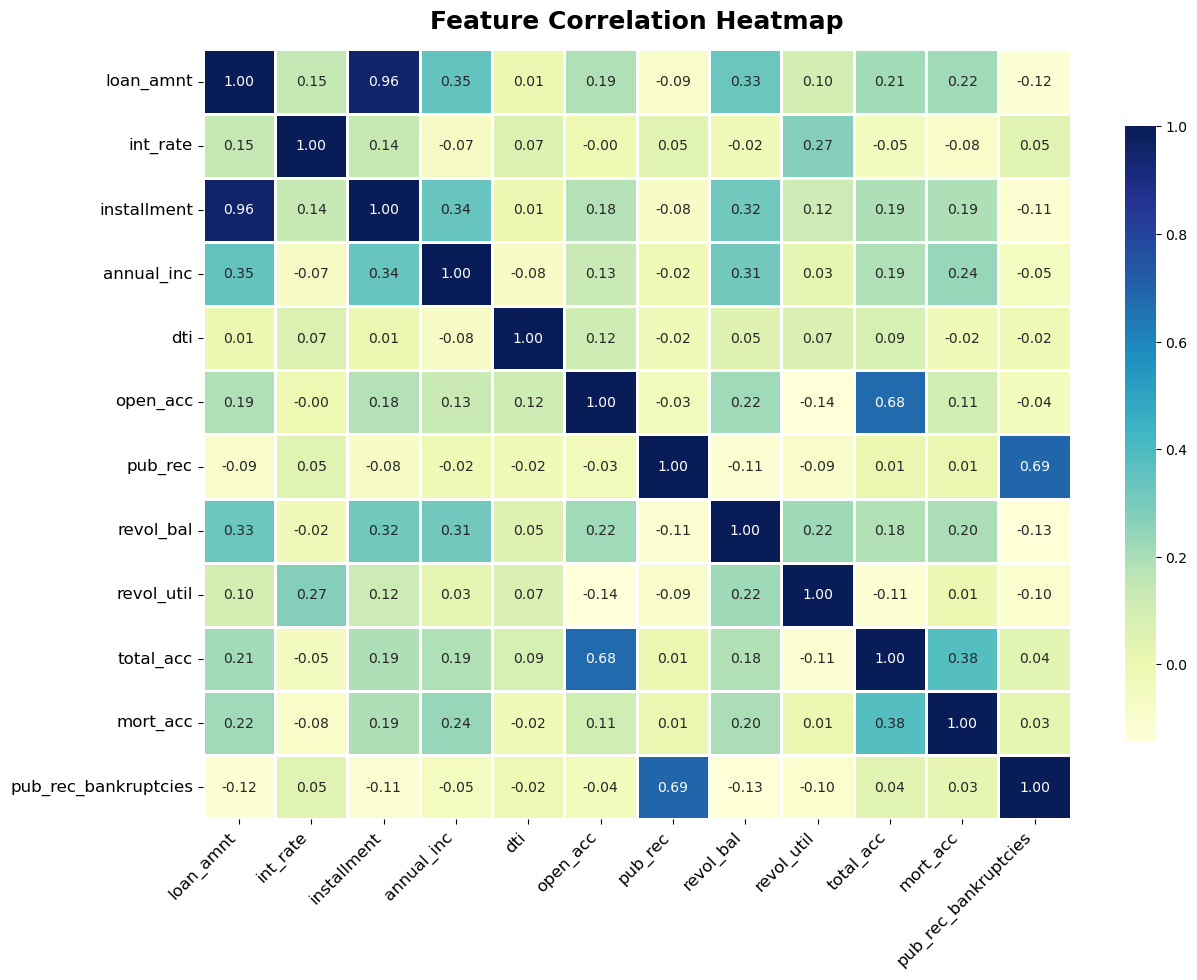

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set figure size
plt.figure(figsize=(14, 10))

# Create heatmap with improved styling
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="YlGnBu",  # More vibrant color scheme
    linewidths=1, 
    linecolor='white',  # White grid for separation
    annot_kws={"size": 10},  # Control annotation size
    cbar_kws={"shrink": 0.8}  # Adjust color bar size
)

# Add title with improved font size and weight
plt.title("Feature Correlation Heatmap", fontsize=18, fontweight='bold', pad=15)

# Improve label readability
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12, rotation=0)

# Show plot
plt.show()


In [191]:
grade_subgrade_mapping = df[['grade', 'sub_grade']].drop_duplicates().sort_values(by=['grade', 'sub_grade'])

display(grade_subgrade_mapping)


,grade,sub_grade
2,A,A1
10,A,A2
29,A,A3
18,A,A4
43,A,A5
35,B,B1
24,B,B2
4,B,B3
33,B,B4
19,B,B5


In [9]:
import datetime
from dateutil.relativedelta import relativedelta

target_date = datetime.datetime(2025, 3, 1)

# Month name to number mapping
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Function to parse dates in MON-YR format and calculate months difference
def calculate_months_from_mar_2025(date_str):
    parts = date_str.split('-')
    month = month_map[parts[0]]
    year = int(parts[1])
    
    # Handle 2-digit years
    if year < 25:
        year += 2000  # Assume 20xx for years less than 25
    elif year < 100:
        year += 1900  # Assume 19xx for years between 25 and 99
    
    date_from = datetime.datetime(year, month, 1)
    diff = relativedelta(target_date, date_from)
    return diff.years * 12 + diff.months

# Calculate months difference from each date to the target date
df['cr_months_from_mar_2025'] = df['earliest_cr_line'].apply(calculate_months_from_mar_2025)

df[['cr_months_from_mar_2025', 'earliest_cr_line']]



,cr_months_from_mar_2025,earliest_cr_line
0,256,Nov-2003
1,309,Jun-1999
2,317,Oct-1998
3,303,Dec-1999
4,440,Jul-1988
...,...,...
316964,588,Mar-1976
316965,294,Sep-2000
316966,271,Aug-2002
316967,282,Sep-2001


In [10]:
df['issue_months_from_mar_2025'] = df['issue_d'].apply(calculate_months_from_mar_2025)

df[['issue_months_from_mar_2025', 'issue_d']]

,issue_months_from_mar_2025,issue_d
0,137,Oct-2013
1,133,Feb-2014
2,108,Mar-2016
3,136,Nov-2013
4,150,Sep-2012
...,...,...
316964,136,Nov-2013
316965,124,Nov-2014
316966,117,Jun-2015
316967,115,Aug-2015


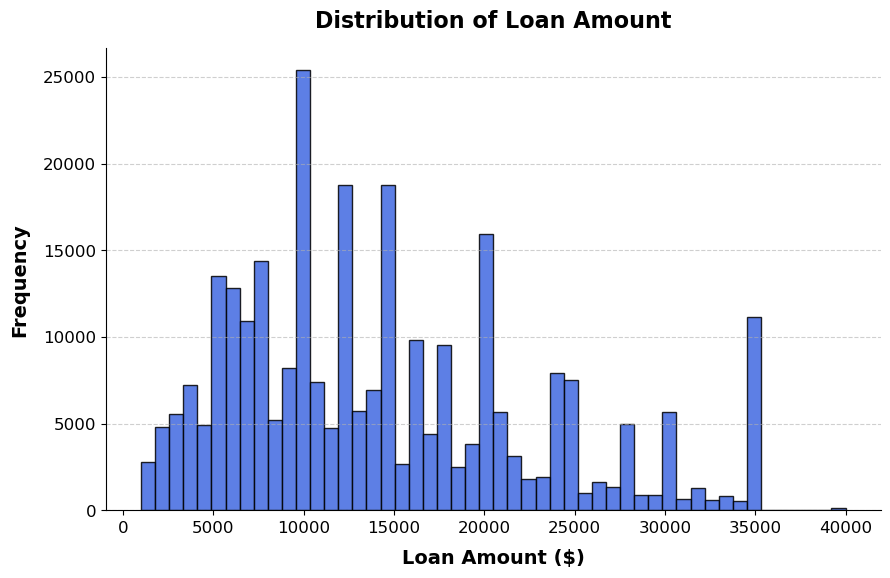

In [194]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Create histogram with improved styling
plt.hist(
    df['loan_amnt'], 
    bins=50, 
    edgecolor='black', 
    alpha=0.85, 
    color='royalblue'  # More visually appealing color
)

# Add title and labels with improved styling
plt.title('Distribution of Loan Amount', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Loan Amount ($)', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Frequency', fontsize=14, fontweight='bold', labelpad=10)

# Improve tick readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid with improved styling
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Remove top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


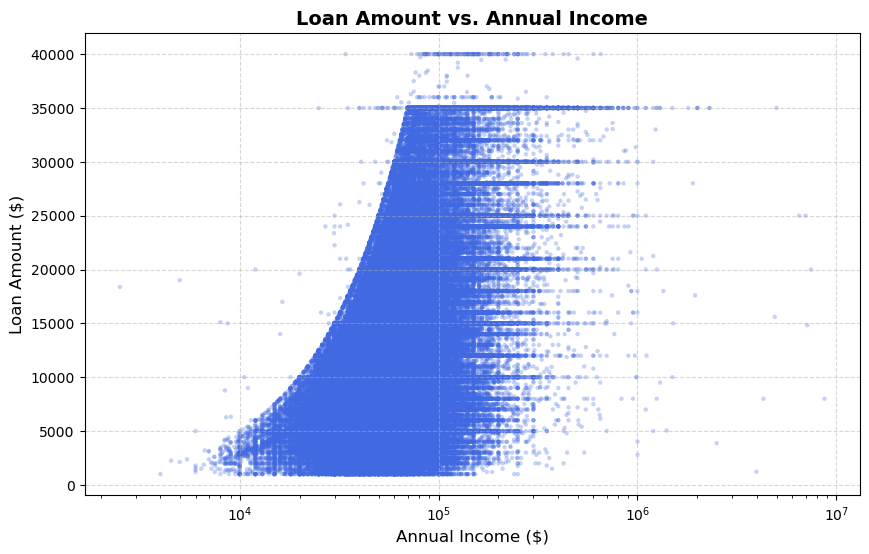

In [195]:
# Improved version of Loan Amount vs. Annual Income scatter plot

plt.figure(figsize=(10, 6))

# Scatter plot with better aesthetics
plt.scatter(df['annual_inc'], df['loan_amnt'], alpha=0.3, color='royalblue', s=10, edgecolor='none')

# Titles and labels
plt.title('Loan Amount vs. Annual Income', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income ($)', fontsize=12)
plt.ylabel('Loan Amount ($)', fontsize=12)

# Log scale for better visualization
plt.xscale('log')

# Grid styling
plt.grid(True, linestyle='--', alpha=0.5)

# Formatting X-axis ticks for readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the improved plot
plt.show()



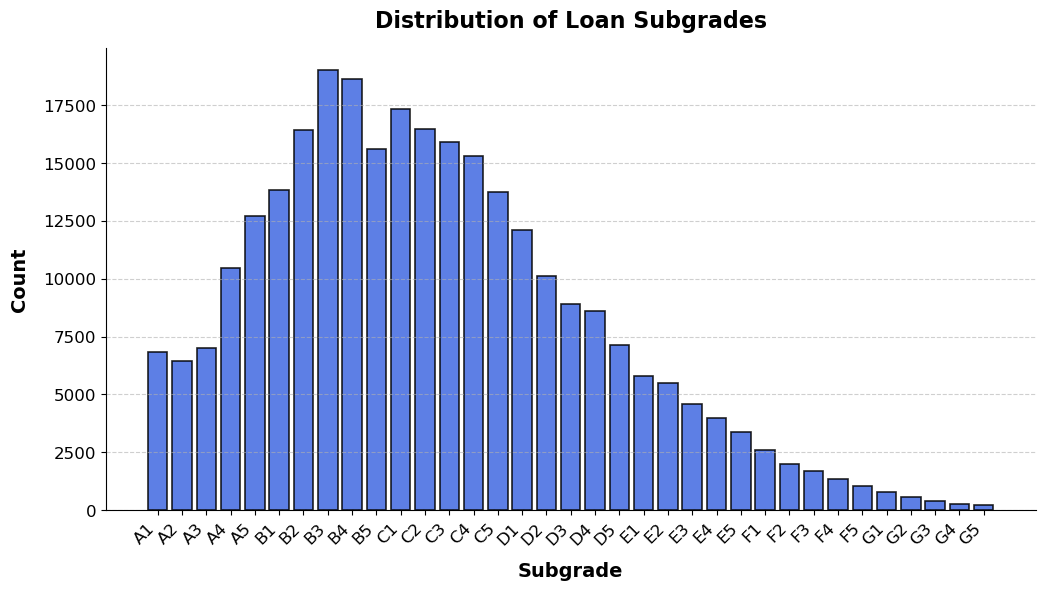

In [196]:
import matplotlib.pyplot as plt

# Count occurrences of each subgrade, ensuring sorted order
subgrade_counts = df['sub_grade'].value_counts().sort_index()

# Set figure size for better readability
plt.figure(figsize=(12, 6))

# Create a bar plot with improved styling
plt.bar(
    subgrade_counts.index, 
    subgrade_counts.values, 
    color='royalblue',  # More vibrant blue
    alpha=0.85, 
    edgecolor="black", 
    linewidth=1.2
)

# Add title and labels with improved styling
plt.title('Distribution of Loan Subgrades', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Subgrade', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Count', fontsize=14, fontweight='bold', labelpad=10)

# Improve tick readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add a grid with improved styling
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Remove top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


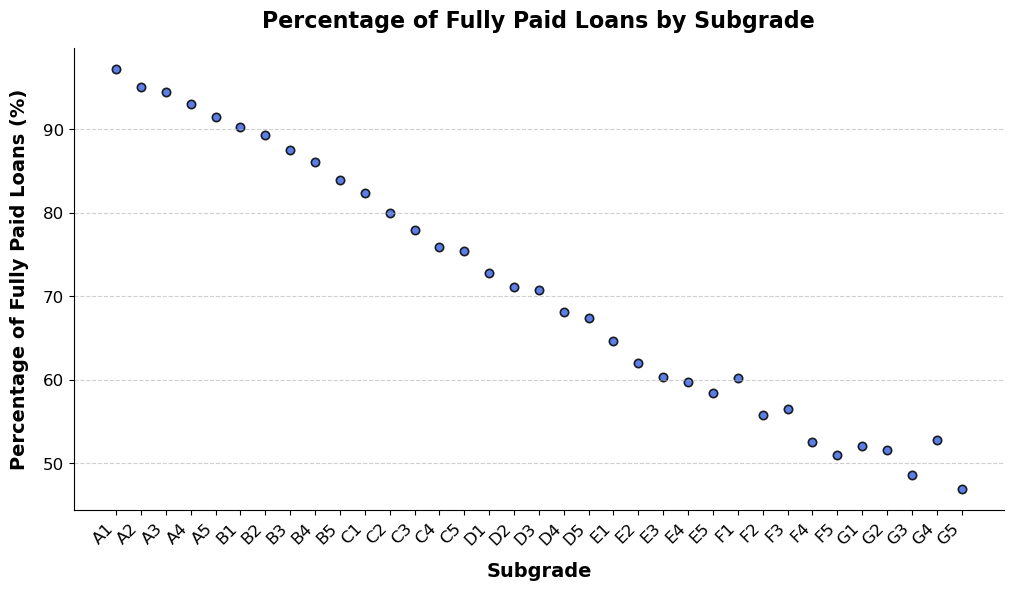

In [36]:
# Set figure size for better readability
plt.figure(figsize=(12, 6))

# Create a scatter plot for Fully Paid percentage
plt.scatter(
    percentage_fully_paid.index, 
    percentage_fully_paid.values, 
    color='royalblue', 
    alpha=0.85, 
    edgecolor="black", 
    linewidth=1.2
)

# Add title and labels with improved styling
plt.title('Percentage of Fully Paid Loans by Subgrade', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Subgrade', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Percentage of Fully Paid Loans (%)', fontsize=14, fontweight='bold', labelpad=10)

# Improve tick readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add a grid with improved styling
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Remove top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


In [197]:
import numpy as np


# Create scatter plot: Loan Amount vs. Annual Income
plt.figure(figsize=(10, 5))
plt.scatter(annual_inc, loan_amnt, alpha=0.6, color='royalblue', edgecolors='black')
plt.title('Loan Amount vs. Annual Income', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Annual Income ($)', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Loan Amount ($)', fontsize=14, fontweight='bold', labelpad=10)
plt.grid(alpha=0.4)
plt.show()

# Create scatter plot: DTI vs. Interest Rate
plt.figure(figsize=(10, 5))
plt.scatter(dti, interest_rate, alpha=0.6, color='crimson', edgecolors='black')
plt.title('DTI vs. Interest Rate', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Debt-to-Income Ratio (%)', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Interest Rate (%)', fontsize=14, fontweight='bold', labelpad=10)
plt.grid(alpha=0.4)
plt.show()


NameError: name 'annual_inc' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['int_rate'], bins=50, edgecolor='black', alpha=0.7, color='orange')
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

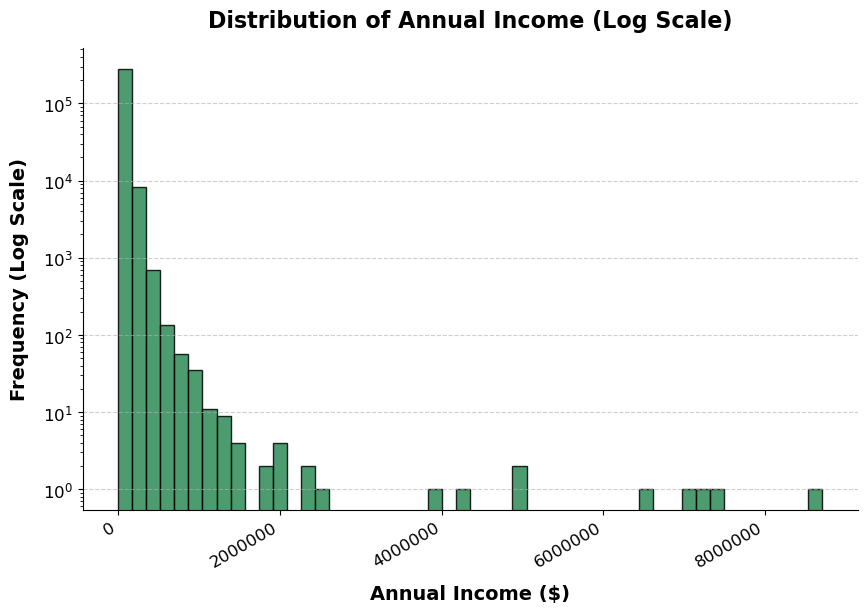

In [198]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Create histogram with improved styling
plt.hist(
    df['annual_inc'], 
    bins=50, 
    edgecolor='black', 
    alpha=0.85, 
    color='seagreen',  # Softer, more visually appealing green
    log=True  # Log scale for Y-axis
)

# Add title and labels with improved styling
plt.title('Distribution of Annual Income (Log Scale)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Annual Income ($)', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, fontweight='bold', labelpad=10)

# Improve tick readability
plt.xticks(fontsize=12, rotation=30, ha='right')  # Rotate x-ticks for better readability
plt.yticks(fontsize=12)

# Format X-axis to show full numbers without scientific notation
plt.ticklabel_format(style='plain', axis='x')

# Add a grid with improved styling
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Remove top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


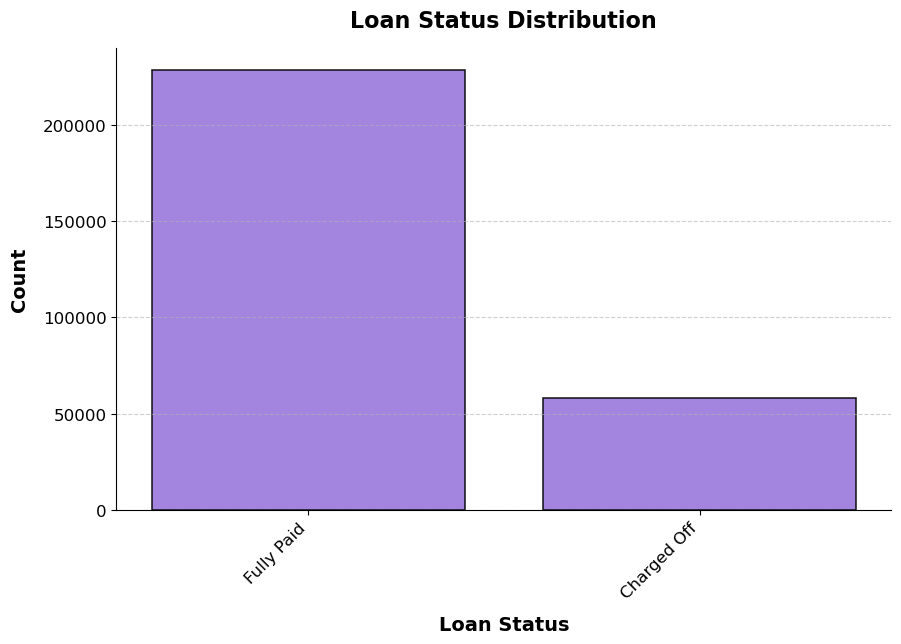

In [199]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Slightly larger for better readability

# Get loan status counts
loan_status_counts = df['loan_status'].value_counts()

# Create a bar plot with enhanced aesthetics
plt.bar(
    loan_status_counts.index, 
    loan_status_counts.values, 
    color='mediumpurple', 
    alpha=0.85, 
    edgecolor="black", 
    linewidth=1.2
)

# Titles and labels with better font sizes
plt.title('Loan Status Distribution', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Loan Status', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Count', fontsize=14, fontweight='bold', labelpad=10)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add a light grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Remove unnecessary spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

/var/folders/yj/s2bm02sj76gczbf_9gwqmfbm0000gn/T/ipykernel_62169/1818574776.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=emp_lengths, vert=True, patch_artist=True, showfliers=False)


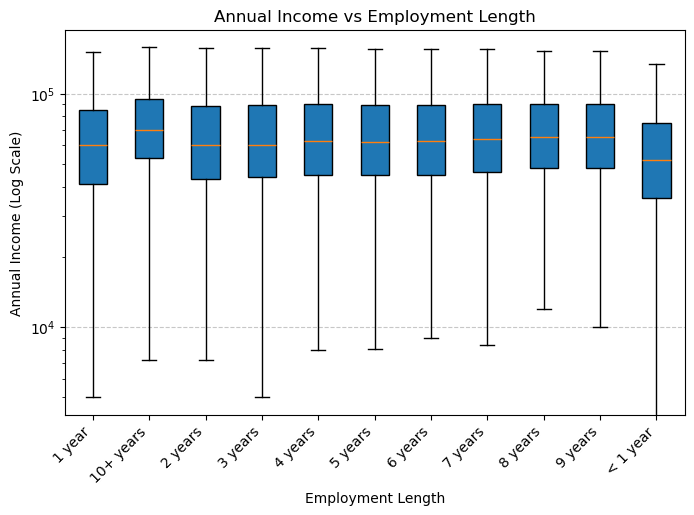

In [200]:
plt.figure(figsize=(8, 5))
emp_lengths = df['emp_length'].dropna().unique()
emp_lengths.sort()  # Sorting the employment length categories

data_to_plot = [df[df['emp_length'] == emp]['annual_inc'].dropna() for emp in emp_lengths]
plt.boxplot(data_to_plot, labels=emp_lengths, vert=True, patch_artist=True, showfliers=False)
plt.title('Annual Income vs Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Annual Income (Log Scale)')
plt.yscale('log')  # Log scale for better visualization
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/yj/s2bm02sj76gczbf_9gwqmfbm0000gn/T/ipykernel_62169/2464459678.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=home_ownerships, vert=True, patch_artist=True, showfliers=False)


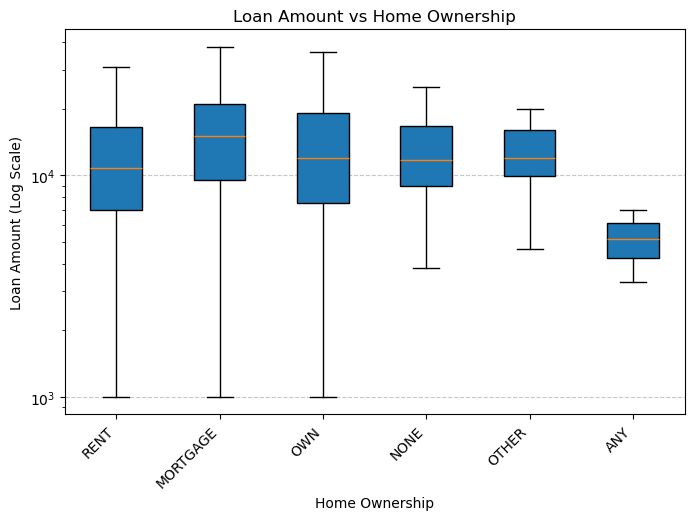

In [201]:
plt.figure(figsize=(8, 5))
home_ownerships = df['home_ownership'].unique()
data_to_plot = [df[df['home_ownership'] == home]['loan_amnt'].dropna() for home in home_ownerships]
plt.boxplot(data_to_plot, labels=home_ownerships, vert=True, patch_artist=True, showfliers=False)
plt.title('Loan Amount vs Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount (Log Scale)')
plt.yscale('log')  # Log scale for better visualization
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

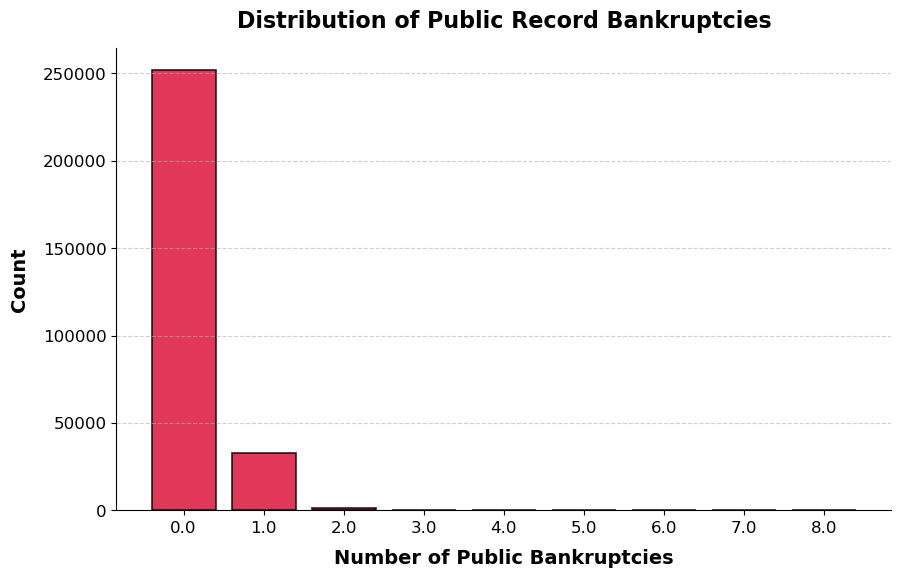

In [202]:
import matplotlib.pyplot as plt

# Count occurrences of each bankruptcy record category
bankruptcy_counts = df['pub_rec_bankruptcies'].value_counts().sort_index()

# Set figure size for better visibility
plt.figure(figsize=(10, 6))

# Create bar plot
plt.bar(
    bankruptcy_counts.index.astype(str),  # Convert to string for better labeling
    bankruptcy_counts.values,
    color='crimson', 
    alpha=0.85, 
    edgecolor="black", 
    linewidth=1.2
)

# Add title and labels with improved styling
plt.title('Distribution of Public Record Bankruptcies', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Number of Public Bankruptcies', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Count', fontsize=14, fontweight='bold', labelpad=10)

# Improve tick readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid with improved styling
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Remove top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


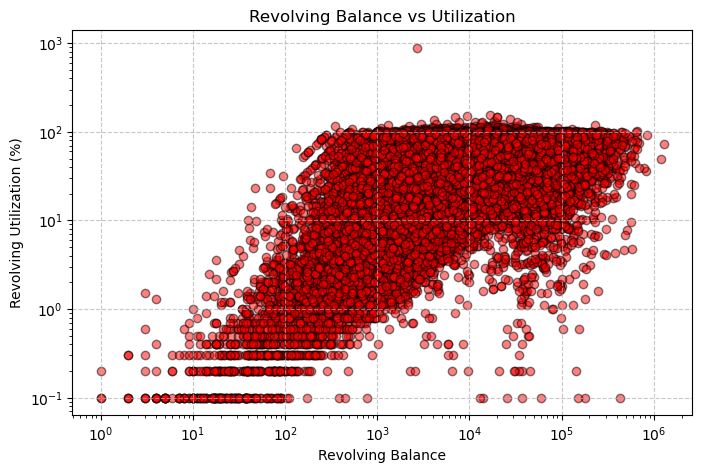

In [203]:
plt.figure(figsize=(8, 5))
plt.scatter(df['revol_bal'], df['revol_util'], alpha=0.5, color='red', edgecolor='black')
plt.title('Revolving Balance vs Utilization')
plt.xlabel('Revolving Balance')
plt.ylabel('Revolving Utilization (%)')
plt.xscale('log')  # Log scale for better visualization
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


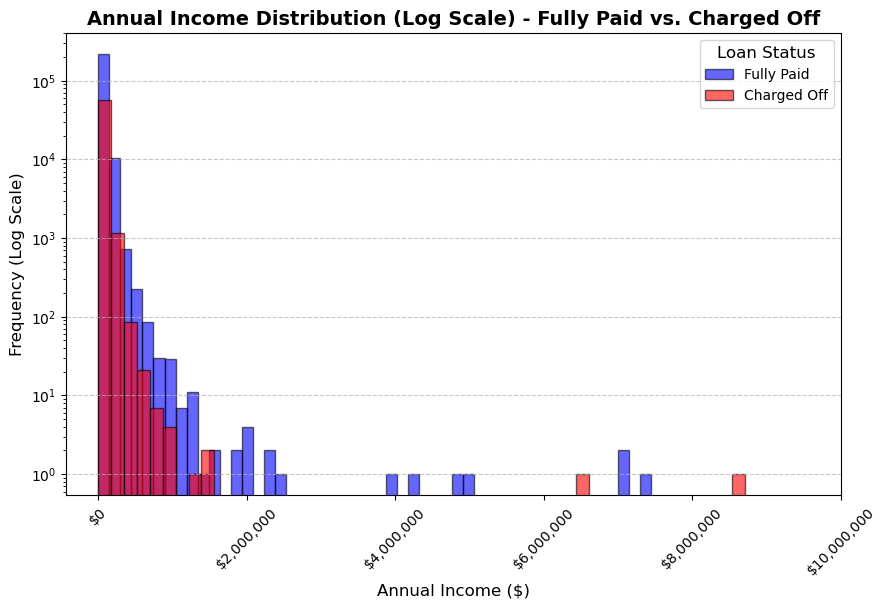

In [204]:

# Filter dataset for "Fully Paid" and "Charged Off" loan statuses
df_filtered = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# Create histograms for both categories
plt.figure(figsize=(10, 6))
plt.hist(df_filtered[df_filtered['loan_status'] == 'Fully Paid']['annual_inc'], bins=50, 
         edgecolor='black', alpha=0.6, color='blue', label='Fully Paid', log=True)
plt.hist(df_filtered[df_filtered['loan_status'] == 'Charged Off']['annual_inc'], bins=50, 
         edgecolor='black', alpha=0.6, color='red', label='Charged Off', log=True)

# Formatting the plot
plt.title('Annual Income Distribution (Log Scale) - Fully Paid vs. Charged Off', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income ($)', fontsize=12)
plt.ylabel('Frequency (Log Scale)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set X-axis ticks every $2M and format to show full numbers
max_income = int(df_filtered['annual_inc'].max())
plt.xticks(range(0, max_income + 2000000, 2000000))
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

# Improve tick label visibility
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Add legend with improved styling
plt.legend(title="Loan Status", fontsize=10, title_fontsize=12, loc='upper right')

# Show the plot
plt.show()


In [205]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 286584 entries, 0 to 316969
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   286584 non-null  float64
 1   term                        286584 non-null  object 
 2   int_rate                    286584 non-null  float64
 3   installment                 286584 non-null  float64
 4   grade                       286584 non-null  object 
 5   sub_grade                   286584 non-null  object 
 6   emp_title                   286584 non-null  object 
 7   emp_length                  286584 non-null  object 
 8   home_ownership              286584 non-null  object 
 9   annual_inc                  286584 non-null  float64
 10  verification_status         286584 non-null  object 
 11  issue_d                     286584 non-null  object 
 12  loan_status                 286584 non-null  object 
 13  purpose            

In [11]:
# Define target variable
y_target = df['loan_status']
y_target = df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})


# Define feature set, excluding 'loan_status' and 'grade' (already in 'sub_grade')
X_features = df.drop(columns=['loan_status', 'grade', 'issue_d', 'earliest_cr_line', 'address', 'emp_title', 'title', 'issue_d', 'earliest_cr_line'])

In [12]:
print(y_target.head())

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler

# Define categorical feature groups
onehot_ftrs = ['term', 'home_ownership', 'verification_status', 
               'purpose', 'initial_list_status', 
               'application_type']

ordinal_ftrs = ['sub_grade', 'emp_length']
ordinal_cats = [['G5', 'G4', 'G3', 'G2', 'G1', 'F5', 'F4', 'F3', 'F2', 'F1', 
                 'E5', 'E4', 'E3', 'E2', 'E1', 'D5', 'D4', 'D3', 'D2', 'D1', 
                 'C5', 'C4', 'C3', 'C2', 'C1', 'B5', 'B4', 'B3', 'B2', 'B1', 
                 'A5', 'A4', 'A3', 'A2', 'A1'], 
                ['< 1 year', '1 year', '2 years', '3 years', '4 years', 
                 '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']]

minmax_ftrs = ['loan_amnt', 'int_rate', 'installment', 'dti', 
               'open_acc', 'pub_rec', 'revol_util', 'total_acc', 
               'mort_acc', 'pub_rec_bankruptcies', 'cr_months_from_mar_2025', 'issue_months_from_mar_2025']

standard_ftrs = ['annual_inc', 'revol_bal']

print("OneHot Features:", len(onehot_ftrs))
print("Ordinal Features:", len(ordinal_ftrs))
print("MinMax Features:", len(minmax_ftrs))
print("Standard Features:", len(standard_ftrs))

# Define preprocessor correctly
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('standard', StandardScaler(), standard_ftrs) 
    ])

# Define pipeline correctly
clf_fixed = Pipeline(steps=[('preprocessor', preprocessor)])



# Fit and transform the data using the correct pipeline
X_transformed = clf_fixed.named_steps['preprocessor'].fit_transform(X_features)

# Get the shape of the transformed X
print("Shape of the transformed X:", X_transformed.shape)


OneHot Features: 6
Ordinal Features: 2
MinMax Features: 12
Standard Features: 2
Shape of the transformed X: (286584, 46)


In [209]:
X_features_test = df_test.drop(columns=[ 'grade', 'issue_d', 'earliest_cr_line', 'address', 'emp_title', 'title', 'issue_d', 'earliest_cr_line'])

NameError: name 'df_test' is not defined

In [210]:
import numpy as np
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Define the number of random states
nr_states = 5
test_scores = np.zeros(nr_states)
final_models = []

# Loop through different random states
for i in range(nr_states):
    print('Random state ' + str(i+1))
    
    # First split: Training and remaining dataset (Stratified)
    X_train, X_other, y_train, y_other = train_test_split(
        X_transformed, y_target, train_size=0.6, random_state=42+i, stratify=y_target
    )
    
    # Second split: Validation and test set (Stratified)
    X_val, X_test, y_val, y_test = train_test_split(
        X_other, y_other, train_size=0.5, random_state=42+i, stratify=y_other
    )
    
    # Define hyperparameter grid
    param_grid = {
        'max_depth': [3, 10, 30, 100],
        'max_features': [0.25, 0.5, 0.75, 1.0]
    }
    
    # Store validation scores
    val_scores = np.zeros(len(ParameterGrid(param_grid)))
    models = []
    
    # Loop through hyperparameter combinations
    for p, params in enumerate(ParameterGrid(param_grid)):
        print('  ', params)
        clf = RandomForestClassifier(**params, random_state=42+i, n_jobs=-1, class_weight='balanced')
        clf.fit(X_train, y_train)
        
        # Predictions and F1 score calculations
        y_train_pred = clf.predict(X_train)
        y_val_pred = clf.predict(X_val)
        
        train_score = f1_score(y_train, y_train_pred, average='weighted')
        val_scores[p] = f1_score(y_val, y_val_pred, average='weighted')
        
        print('  Train F1 Score:', train_score, 'Validation F1 Score:', val_scores[p])
        models.append(clf)
    
    # Select the best model based on validation F1 score
    best_model_idx = np.argmax(val_scores)
    final_models.append(models[best_model_idx])
    print('Best model parameters:', ParameterGrid(param_grid)[best_model_idx])
    print('Corresponding validation F1 score:', np.max(val_scores))
    
    # Evaluate the best model on the test set
    y_test_pred = final_models[-1].predict(X_test)
    test_scores[i] = f1_score(y_test, y_test_pred, average='weighted')
    print('Test F1 score:', test_scores[i])

# Display final test scores
print('Final test F1 scores:', test_scores)


Random state 1
   {'max_depth': 3, 'max_features': 0.25}
  Train F1 Score: 0.6493760889745225 Validation F1 Score: 0.6483350957300235
   {'max_depth': 3, 'max_features': 0.5}
  Train F1 Score: 0.6460992536642566 Validation F1 Score: 0.6445471074962562
   {'max_depth': 3, 'max_features': 0.75}
  Train F1 Score: 0.6417319754970493 Validation F1 Score: 0.6407042850942363
   {'max_depth': 3, 'max_features': 1.0}
  Train F1 Score: 0.6417268063744925 Validation F1 Score: 0.6407042850942363
   {'max_depth': 10, 'max_features': 0.25}
  Train F1 Score: 0.7232705081932866 Validation F1 Score: 0.7072608016360874
   {'max_depth': 10, 'max_features': 0.5}
  Train F1 Score: 0.7255903687889322 Validation F1 Score: 0.7076642392729895
   {'max_depth': 10, 'max_features': 0.75}
  Train F1 Score: 0.7255503993641539 Validation F1 Score: 0.7074555156925852
   {'max_depth': 10, 'max_features': 1.0}
  Train F1 Score: 0.7243303929627029 Validation F1 Score: 0.7063971316939335
   {'max_depth': 30, 'max_feature

In [220]:
import numpy as np

rfc_array = np.array([0.750740977075913, 0.7482803535070929, 0.7493846073000714, 0.7479030049542718, 0.7474712350352888])

# Calculate mean and standard deviation
mean = np.mean(rfc_array)
std_dev = np.std(rfc_array)

print(f"Random Forest Classifier Mean: {mean}")
print(f"Random Forest Classifier Standard Deviation: {std_dev}")

Random Forest Classifier Mean: 0.7487560355745275
Random Forest Classifier Standard Deviation: 0.0011781122418578582


In [219]:

logistic_array = np.array([0.7092409908786427, 0.7062613322315874, 0.7055805772139307, 0.705641410932102, 0.7058570362140756])

# Calculate mean and standard deviation
mean = np.mean(logistic_array)
std_dev = np.std(logistic_array)

print(f"Logistic Regression Mean: {mean}")
print(f"Logistic Regression Standard Deviation: {std_dev}")

Logistic Regression Mean: 0.7065162694940678
Logistic Regression Standard Deviation: 0.0013830824773210678


In [217]:

xgb_array = np.array([0.7390225703199585, 0.7343875888619064, 0.735581816935543, 0.7382079970084484, 0.738031405949086])

# Calculate mean and standard deviation
mean = np.mean(xgb_array)
std_dev = np.std(xgb_array)

print(f"XG Boost Mean: {mean}")
print(f"XG Boost Standard Deviation: {std_dev}")

XG Boost Mean: 0.7370462758149884
XG Boost Standard Deviation: 0.0017572178924021677


In [218]:

svc_array = np.array([0.7081536261611088, 0.7081536261611088, 0.7084214291439563, 0.7085368591422339, 0.7081536261611088])

# Calculate mean and standard deviation
mean = np.mean(svc_array)
std_dev = np.std(svc_array)

print(f"XG Boost Mean: {mean}")
print(f"XG Boost Standard Deviation: {std_dev}")

XG Boost Mean: 0.7082838333539033
XG Boost Standard Deviation: 0.00016359485943446476


In [57]:
# Given confusion matrix values
false_positives = 228668/286584
false_negatives = 0
true_positives = 57916/286584

# Calculate precision and recall for the majority class baseline
# Baseline assumes predicting all as the majority class (negative class)
precision_baseline = true_positives / (true_positives + false_positives)
recall_baseline = true_positives / (true_positives + false_negatives)

# Calculate the F2 score
beta = 2
f1_baseline = (1 + beta**1) * (precision_baseline * recall_baseline) / (
    beta**1 * precision_baseline + recall_baseline
)

# Print the results
precision_baseline, recall_baseline, f1_baseline

(0.2020908354967479, 1.0, 0.4317621565742913)

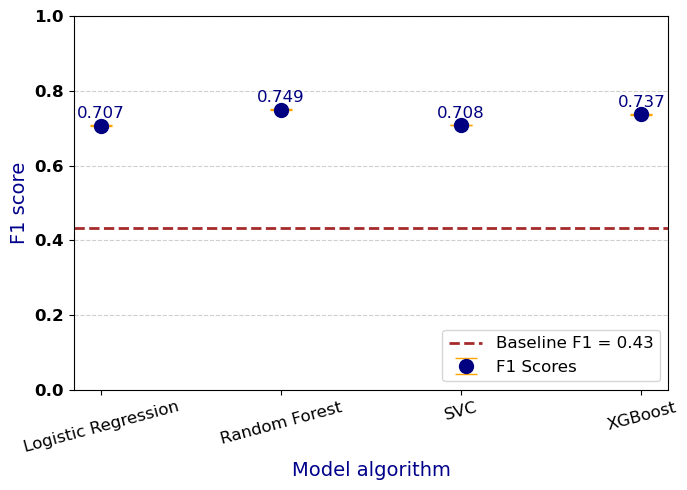

In [221]:
import matplotlib.pyplot as plt
import numpy as np

# Data for F1 scores
algorithms = ['Logistic Regression', 'Random Forest', 'SVC', 'XGBoost']
mean_f1_scores = [0.70651, 0.74875, 0.70828, 0.73704]
std_devs = [0.00138, 0.00117, 0.00016, 0.00175]
baseline_f1 = 0.4317

# X positions
x_pos = np.arange(len(algorithms))

# Create the plot
plt.figure(figsize=(7, 5))
plt.errorbar(x_pos, mean_f1_scores, yerr=std_devs, fmt='o', color='navy', ecolor='orange',
             capsize=8, markersize=10, elinewidth=2, label='F1 Scores')

# Add baseline as a horizontal line
plt.axhline(y=baseline_f1, color='brown', linestyle='--', linewidth=2, label=f'Baseline F1 = {baseline_f1:.2f}')

# Customize plot appearance
plt.ylabel('F1 score', fontsize=14, color='darkblue')
plt.xlabel('Model algorithm', fontsize=14, color='darkblue')
plt.xticks(x_pos, algorithms, fontsize=12, rotation=15)
plt.ylim(0, 1)
plt.yticks(fontsize=12, fontweight='bold')

# Add legend
plt.legend(fontsize=12, loc='lower right')

# Annotate each F2 score above the points
for i, score in enumerate(mean_f1_scores):
    plt.text(x_pos[i], score + 0.02, f"{score:.3f}", ha='center', fontsize=12, color='navy')

# Add grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.savefig('Fig6.jpeg')
plt.show()


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# Split data first before applying transformations
random_state = 3
X_train, X_other, y_train, y_other = train_test_split(
    X_features, y_target, train_size=0.6, random_state=random_state, stratify=y_target
)
X_val, X_test, y_val, y_test = train_test_split(
    X_other, y_other, train_size=0.5, random_state=random_state, stratify=y_other
)

# Now fit the preprocessor only on the training set and transform the validation/test sets
X_train_prep = clf_fixed.fit_transform(X_train)  # Fit and transform training set
X_val_prep = clf_fixed.transform(X_val)  # Transform validation set
X_test_prep = clf_fixed.transform(X_test)  # Transform test set

# Initialize and train the RandomForestClassifier
best_params = {'max_depth': 30, 'max_features': 1.0}
clf = RandomForestClassifier(**best_params, random_state=random_state, n_jobs=-1, class_weight='balanced')
clf.fit(X_train_prep, y_train)

# Function to evaluate model performance
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        "F1 Score": f1_score(y, y_pred, average='weighted'),
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred, average='weighted'),
        "Recall": recall_score(y, y_pred, average='weighted')
    }

# Compute evaluation metrics for train, validation, and test sets
results = {
    "Train": evaluate_model(clf, X_train_prep, y_train),
    "Validation": evaluate_model(clf, X_val_prep, y_val),
    "Test": evaluate_model(clf, X_test_prep, y_test)
}

# Display results
results


{'Train': {'F1 Score': 0.9992618842137762,
  'Accuracy': 0.9992614132015121,
  'Precision': 0.9992638342468387,
  'Recall': 0.9992614132015121},
 'Validation': {'F1 Score': 0.7474822707372738,
  'Accuracy': 0.7953661217439852,
  'Precision': 0.7470295940253402,
  'Recall': 0.7953661217439852},
 'Test': {'F1 Score': 0.7497765782597295,
  'Accuracy': 0.7970933579915208,
  'Precision': 0.7508271038223316,
  'Recall': 0.7970933579915208}}

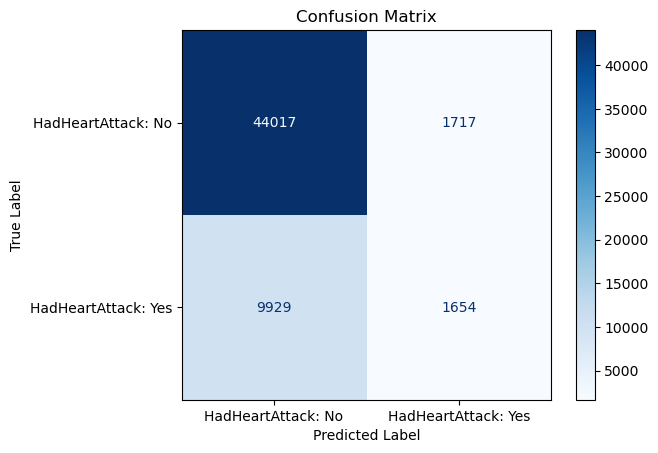

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions for the test set
y_test_pred = clf.predict(X_test)  # Ensure predictions are made on the transformed test set

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Customize the Confusion Matrix Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['HadHeartAttack: No', 'HadHeartAttack: Yes'])
disp.plot(cmap='Blues', values_format='d')  # Use 'd' for integer formatting
disp.ax_.set_title("Confusion Matrix")
disp.ax_.set_xlabel("Predicted Label")
disp.ax_.set_ylabel("True Label")

plt.show()


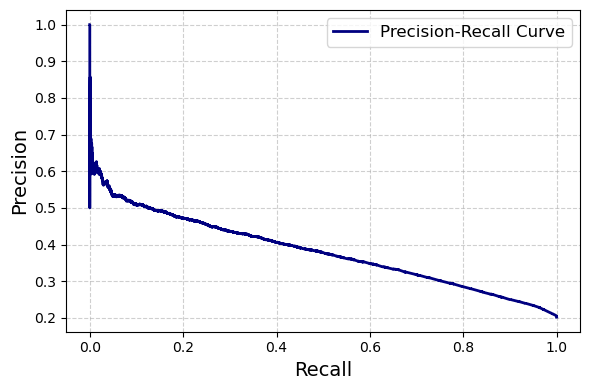

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Ensure test data is preprocessed before passing to the classifier
X_test_prep = clf_fixed.transform(X_test)  # Apply preprocessing

# Compute predicted probabilities for the test set using the trained RandomForest model
y_test_proba = clf.predict_proba(X_test_prep)[:, 1]  # Use clf instead of undefined clf_lr

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)  # Use y_test instead of y_test_encoded

# Plot Precision-Recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label='Precision-Recall Curve', color='navy', linewidth=2)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.grid(alpha=0.6, linestyle='--')
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Fig8.jpeg')

# Show the plot
plt.show()


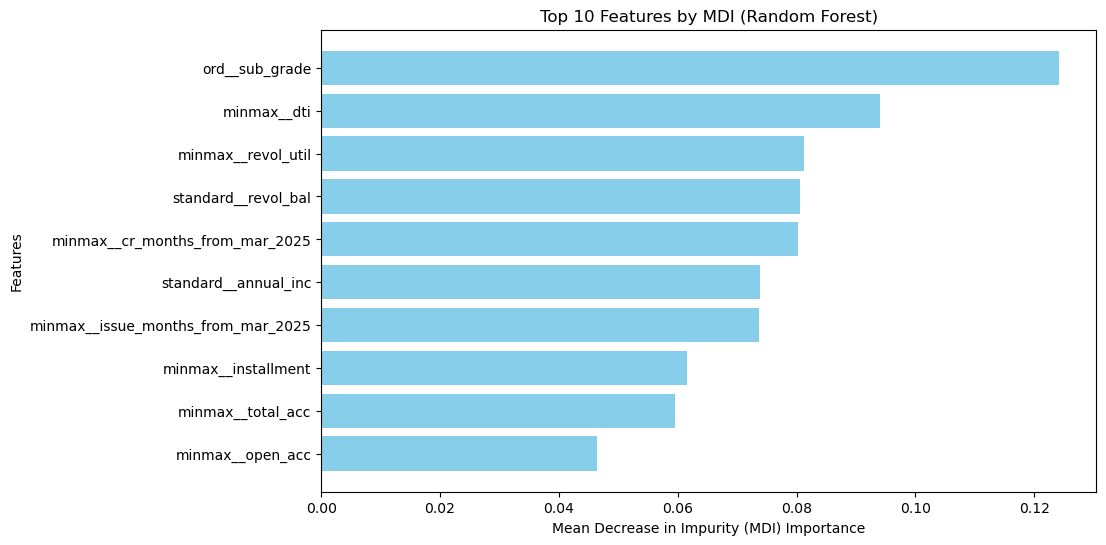

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance scores from RandomForest
feature_importance = clf.feature_importances_

# Get feature names from preprocessor
feature_names = clf_fixed.named_steps['preprocessor'].get_feature_names_out()

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]
top_n = 10  # Select top 10 features
top_features = np.array(feature_names)[sorted_idx][:top_n]
top_importance_values = feature_importance[sorted_idx][:top_n]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importance_values, color='skyblue')
plt.xlabel("Mean Decrease in Impurity (MDI) Importance")
plt.ylabel("Features")
plt.title("Top 10 Features by MDI (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


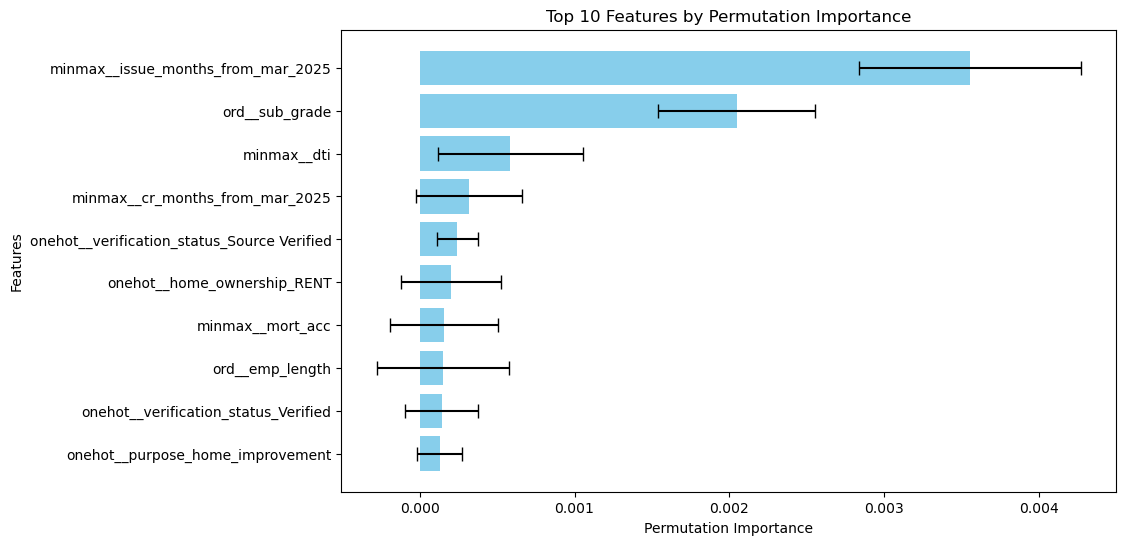

In [25]:
from sklearn.inspection import permutation_importance

# Compute permutation importance using test set
perm_importance = permutation_importance(clf, X_test_prep, y_test, n_repeats=10, random_state=42)

# Extract feature names and scores
importance_values = perm_importance.importances_mean
importance_std = perm_importance.importances_std

# Sort features by importance
sorted_idx = np.argsort(importance_values)[::-1]
top_features = np.array(feature_names)[sorted_idx][:10]
top_importance_values = importance_values[sorted_idx][:10]
top_importance_stds = importance_std[sorted_idx][:10]

# Plot permutation importance
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importance_values, xerr=top_importance_stds, color='skyblue', capsize=5, ecolor='black')
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Top 10 Features by Permutation Importance")
plt.gca().invert_yaxis()
plt.show()


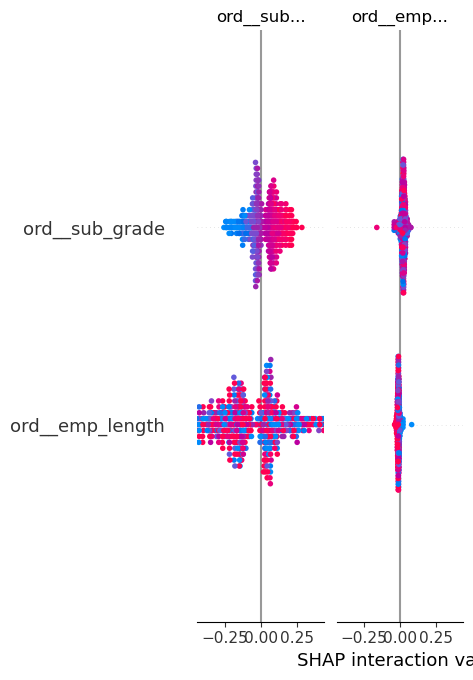

<Figure size 640x480 with 0 Axes>

In [16]:
import shap
import matplotlib.pyplot as plt

# Explicitly fit the preprocessor to the training data
clf_fixed.named_steps['preprocessor'].fit(X_train)

# Get the transformed feature names
feature_names = clf_fixed.named_steps['preprocessor'].get_feature_names_out()

# Initialize the SHAP explainer using the fitted model and preprocessed training data
explainer = shap.TreeExplainer(clf)

# Compute SHAP values for the preprocessed test data (subsampled for efficiency)
sample_size = min(500, X_test_prep.shape[0])  # Limit to 500 instances for faster computation
X_test_sample = X_test_prep[:sample_size]
shap_values = explainer.shap_values(X_test_sample)

# Extract SHAP values for the positive class (for binary classification)
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# Create the SHAP summary plot
shap.summary_plot(
    shap_values,
    features=X_test_sample,
    feature_names=feature_names
)

# Save the plot
plt.savefig('Fig11.jpeg', bbox_inches='tight')


In [21]:
import lime
import lime.lime_tabular
import numpy as np

# Explicitly fit the preprocessor to the training data
clf_fixed.named_steps['preprocessor'].fit(X_train)

# Get the transformed feature names from the preprocessor
feature_names = clf_fixed.named_steps['preprocessor'].get_feature_names_out()

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_prep,  # Preprocessed training data
    feature_names=feature_names,  # Extracted feature names
    class_names=['Class 0', 'Class 1'],  # Adjust based on your classification problem
    mode="classification"
)

# Select a single instance for local explanation
instance_index = 0  # Change this index to analyze different instances
X_instance = X_test_prep[instance_index].reshape(1, -1)  # Reshape for a single instance

# Generate LIME explanation
exp = explainer.explain_instance(X_instance[0], clf.predict_proba, num_features=10)

# Show the explanation as an HTML file
exp.save_to_file('Fig13_lime_local.html')

# Print explanation in notebook
exp.show_in_notebook()


In [ ]:
import shap
import matplotlib.pyplot as plt

# Explicitly fit the preprocessor to the training data
clf_fixed.named_steps['preprocessor'].fit(X_train)

# Get the transformed feature names
feature_names = clf_fixed.named_steps['preprocessor'].get_feature_names_out()

# Initialize the SHAP explainer using the trained RandomForest model
explainer = shap.Explainer(clf, X_train_prep)

# Select a single instance for local SHAP explanation
instance_index = 0  # Change this index to analyze different instances
X_instance = X_test_prep[instance_index].reshape(1, -1)

# Compute SHAP values for this specific instance
shap_values_instance = explainer(X_instance)

# Generate a SHAP force plot (local explanation)
shap.waterfall_plot(shap.Explanation(values=shap_values_instance.values[0], feature_names=feature_names))

# Save the local SHAP force plot
plt.savefig('Fig12_shap_local.jpeg', bbox_inches='tight')
plt.show()


In [14]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# Set random state for reproducibility
random_state = 3

# Fit and transform the entire dataset
X_prep = clf_fixed.fit_transform(X_features)

# Initialize and train the RandomForestClassifier on the entire dataset
best_params = {'max_depth': 30, 'max_features': 1.0}
clf = RandomForestClassifier(**best_params, random_state=random_state, n_jobs=-1, class_weight='balanced')
clf.fit(X_prep, y_target)

# Function to evaluate model performance
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        "F1 Score": f1_score(y, y_pred, average='weighted'),
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred, average='weighted'),
        "Recall": recall_score(y, y_pred, average='weighted')
    }

# Compute evaluation metrics on the training set (since no split)
results = evaluate_model(clf, X_prep, y_target)

# Display results
results


{'F1 Score': 0.9986964801579074,
 'Accuracy': 0.9986949725036988,
 'Precision': 0.99870284490705,
 'Recall': 0.9986949725036988}

In [58]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt

df_test = pd.read_csv('test.csv')
print ("Number of Columns: ", df_test.shape[1])
print ("Number of Rows: ", df_test.shape[0])

Number of Columns:  27
Number of Rows:  79060


In [59]:
# Fill missing values with 'Unknown' for categorical columns
df_test['emp_title'] = df_test['emp_title'].fillna('Unknown')
df_test['title'] = df_test['title'].fillna('Unknown')

# Fill missing values for emp_length with '< 1 year'
df_test['emp_length'] = df_test['emp_length'].fillna('< 1 year')

# Drop rows with missing values for these
df_test = df_test.dropna(subset=['revol_util', 'mort_acc', 'pub_rec_bankruptcies'])

In [60]:
print(df_test.info()).info()

<class 'pandas.core.frame.DataFrame'>
Index: 71430 entries, 0 to 79059
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   u                     71430 non-null  int64  
 1   loan_amnt             71430 non-null  int64  
 2   term                  71430 non-null  object 
 3   int_rate              71430 non-null  float64
 4   installment           71430 non-null  float64
 5   grade                 71430 non-null  object 
 6   sub_grade             71430 non-null  object 
 7   emp_title             71430 non-null  object 
 8   emp_length            71430 non-null  object 
 9   home_ownership        71430 non-null  object 
 10  annual_inc            71430 non-null  float64
 11  verification_status   71430 non-null  object 
 12  issue_d               71430 non-null  object 
 13  purpose               71430 non-null  object 
 14  title                 71430 non-null  object 
 15  dti                   71

AttributeError: 'NoneType' object has no attribute 'info'

In [61]:
print ("Number of Columns: ", df_test.shape[1])
print ("Number of Rows: ", df_test.shape[0])

Number of Columns:  27
Number of Rows:  71430


In [62]:
import numpy as np

# Convert column 'u' to a NumPy array
u_array = df_test['u'].to_numpy()

# Print the array
print(u_array)
u_array.shape


[    0     1     2 ... 79057 79058 79059]


(71430,)

In [63]:

df_test['cr_months_from_mar_2025'] = df_test['earliest_cr_line'].apply(calculate_months_from_mar_2025)

df_test[['cr_months_from_mar_2025', 'earliest_cr_line']]



,cr_months_from_mar_2025,earliest_cr_line
0,385,Feb-93
1,312,Mar-99
2,412,Nov-90
3,233,Oct-05
4,289,Feb-01
...,...,...
79055,267,Dec-02
79056,241,Feb-05
79057,408,Mar-91
79058,415,Aug-90


In [64]:
df_test['issue_months_from_mar_2025'] = df_test['issue_d'].apply(calculate_months_from_mar_2025)

df_test[['issue_months_from_mar_2025', 'issue_d']]

,issue_months_from_mar_2025,issue_d
0,144,Mar-13
1,133,Feb-14
2,127,Aug-14
3,122,Jan-15
4,150,Sep-12
...,...,...
79055,146,Jan-13
79056,117,Jun-15
79057,113,Oct-15
79058,134,Jan-14


In [65]:

# Define feature set, excluding 'loan_status' and 'grade' (already in 'sub_grade')
X_features_test = df_test.drop(columns= ['u', 'grade', 'issue_d', 'earliest_cr_line', 'address', 'emp_title', 'title', 'issue_d', 'earliest_cr_line'])

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler

# Define categorical feature groups
onehot_ftrs = ['term', 'home_ownership', 'verification_status', 
               'purpose', 'initial_list_status', 
               'application_type']

ordinal_ftrs = ['sub_grade', 'emp_length']
ordinal_cats = [['G5', 'G4', 'G3', 'G2', 'G1', 'F5', 'F4', 'F3', 'F2', 'F1', 
                 'E5', 'E4', 'E3', 'E2', 'E1', 'D5', 'D4', 'D3', 'D2', 'D1', 
                 'C5', 'C4', 'C3', 'C2', 'C1', 'B5', 'B4', 'B3', 'B2', 'B1', 
                 'A5', 'A4', 'A3', 'A2', 'A1'], 
                ['< 1 year', '1 year', '2 years', '3 years', '4 years', 
                 '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']]

minmax_ftrs = ['loan_amnt', 'int_rate', 'installment', 'dti', 
               'open_acc', 'pub_rec', 'revol_util', 'total_acc', 
               'mort_acc', 'pub_rec_bankruptcies', 'cr_months_from_mar_2025', 'issue_months_from_mar_2025']

standard_ftrs = ['annual_inc', 'revol_bal']

print("OneHot Features:", len(onehot_ftrs))
print("Ordinal Features:", len(ordinal_ftrs))
print("MinMax Features:", len(minmax_ftrs))
print("Standard Features:", len(standard_ftrs))

# Define preprocessor correctly
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('standard', StandardScaler(), standard_ftrs) 
    ])

# Define pipeline correctly
clf = Pipeline(steps=[('preprocessor', preprocessor)])



# Fit and transform the data using the correct pipeline
X_transformed_test = clf.named_steps['preprocessor'].fit_transform(X_features_test)

# Get the shape of the transformed X
print("Shape of the transformed X:", X_transformed_test.shape)


OneHot Features: 6
Ordinal Features: 2
MinMax Features: 12
Standard Features: 2
Shape of the transformed X: (71430, 45)


In [67]:
import numpy as np

# Get feature names for each transformer in ColumnTransformer
ordinal_names = preprocessor.transformers_[0][1].get_feature_names_out(ordinal_ftrs)
onehot_names = preprocessor.transformers_[1][1].get_feature_names_out(onehot_ftrs)
minmax_names = np.array(minmax_ftrs)  # MinMaxScaler keeps original feature names
standard_names = np.array(standard_ftrs)  # StandardScaler keeps original feature names

# Concatenate all feature names
all_feature_names = np.concatenate([ordinal_names, onehot_names, minmax_names, standard_names])

# Print the feature names
print("Transformed Feature Names (X_transformed_test):")
for i, name in enumerate(all_feature_names, 1):
    print(f"{i}. {name}")


Transformed Feature Names (X_transformed_test):
1. sub_grade
2. emp_length
3. term_ 36 months
4. term_ 60 months
5. home_ownership_ANY
6. home_ownership_MORTGAGE
7. home_ownership_NONE
8. home_ownership_OTHER
9. home_ownership_OWN
10. home_ownership_RENT
11. verification_status_Not Verified
12. verification_status_Source Verified
13. verification_status_Verified
14. purpose_car
15. purpose_credit_card
16. purpose_debt_consolidation
17. purpose_home_improvement
18. purpose_house
19. purpose_major_purchase
20. purpose_medical
21. purpose_moving
22. purpose_other
23. purpose_renewable_energy
24. purpose_small_business
25. purpose_vacation
26. purpose_wedding
27. initial_list_status_f
28. initial_list_status_w
29. application_type_DIRECT_PAY
30. application_type_INDIVIDUAL
31. application_type_JOINT
32. loan_amnt
33. int_rate
34. installment
35. dti
36. open_acc
37. pub_rec
38. revol_util
39. total_acc
40. mort_acc
41. pub_rec_bankruptcies
42. cr_months_from_mar_2025
43. issue_months_from_

In [68]:
import pandas as pd

# Convert transformed test data to a DataFrame
X_transformed_test_df = pd.DataFrame(X_transformed_test, columns=all_feature_names)

# Identify the correct position of 'purpose_educational' (it was missing in test data)
insert_index = list(X_transformed_test_df.columns).index("purpose_car")  # Comes before 'purpose_car'

# Insert the missing column at the correct index
X_transformed_test_df.insert(insert_index, "purpose_educational", 0)

# Verify that we now have 46 columns and 'purpose_educational' exists
print(f"Final shape of X_transformed_test: {X_transformed_test_df.shape}")
print("Purpose Educational Column Added:", "purpose_educational" in X_transformed_test_df.columns)



Final shape of X_transformed_test: (71430, 46)
Purpose Educational Column Added: True


In [69]:
from sklearn.pipeline import Pipeline

# Ensure clf includes both preprocessing and the classifier
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', RandomForestClassifier(**best_params, random_state=random_state, n_jobs=-1, class_weight='balanced'))
])

# Fit the updated pipeline on the full dataset
clf_pipeline.fit(X_features, y_target)

# Transform and predict on the test set
y_pred_test = clf_pipeline.predict(X_features_test)

# Display predictions
y_pred_test


array([0, 0, 0, ..., 0, 0, 0])

In [70]:
# Get the shape of the predicted test labels
y_pred_test.shape


(71430,)

In [72]:
import pandas as pd

# Convert X_features_test to a DataFrame (if it is not already)
X_features_test_df = pd.DataFrame(X_features_test, columns=all_feature_names)

# Add predictions as a new column
X_features_test_df['Predicted_Target'] = y_pred_test

# Ensure 'u' column exists as the first column
X_features_test_df.insert(0, 'u', u_array)  # Assuming u_array is already defined

# Save the DataFrame to a CSV file
csv_filename = "predictions_with_features.csv"
X_features_test_df.to_csv(csv_filename, index=False)

print(f"File saved successfully: {csv_filename}")



File saved successfully: predictions_with_features.csv


In [74]:
import pandas as pd

df_output = pd.DataFrame({'u': u_array, 'loan_status': y_pred_test})

# Save the DataFrame to a CSV file
csv_filename = "u_predicted_target.csv"
df_output.to_csv(csv_filename, index=False)

print(f"File saved successfully: {csv_filename}")


File saved successfully: u_predicted_target.csv


In [75]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt

df_pred = pd.read_csv('predictions_with_features.csv')
print ("Number of Columns: ", df_pred.shape[1])
print ("Number of Rows: ", df_pred.shape[0])

Number of Columns:  47
Number of Rows:  71430


In [77]:

# Get the total number of rows
total_rows = df_pred.shape[0]

# Calculate the percentage of unique values in 'Predicted_Target'
predicted_target_counts = df_pred['Predicted_Target'].value_counts(normalize=True) * 100

# Get the total number of unique values
unique_values_count = df_pred['Predicted_Target'].nunique()

# Display results
predicted_target_counts_df = pd.DataFrame({
    'Predicted_Target': predicted_target_counts.index,
    'Percentage': predicted_target_counts.values
})

print("Predicted Target Distribution:")   
print(predicted_target_counts)
print(f"\nTotal Number of Rows: {total_rows}")
print(f"Total Unique Values in 'Predicted_Target': {unique_values_count}")


Predicted Target Distribution:
Predicted_Target
0    93.901722
1     6.098278
Name: proportion, dtype: float64

Total Number of Rows: 71430
Total Unique Values in 'Predicted_Target': 2
